In [1]:
from sympy import *
from syscirc.plot import plotcont
from syscirc.symbolics import Known, op_lr
from syscirc.components import *

# Circuits Exercise 1
---

## 1. Output V_o(t) for the circuit
---

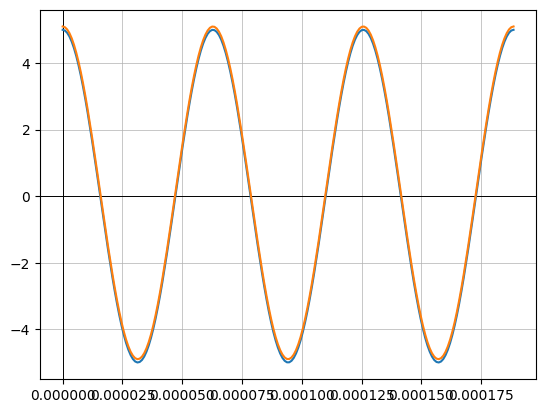

In [2]:
t = Symbol("t", real=True)

ω = Known("ω",1e5)
Vg = Known("V_g", 5*exp(1j*ω*t))
I1 = Known("I_1", Symbol("I_1"))
I2 = Known("I_2", Symbol("I_2"))

R1 = Resistor(Known("R1", 20), "R1", I=I1)
C = Capacitor(Known("C", 2e-7), ω, name="C", I=I1-I2)
L = Inductor(Known("L", 4e-4), ω, name="L", I=I2)
R2 = Resistor(Known("R2", 80), "R2", I=I2)

plotcont([re(Vg), re(5*exp(1j*ω*t))+0.1], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

In [3]:
loop1 = Eq(Vg, R1.V + C.V)
loop1 = Known.resolve(loop1, exclude=Vg)
loop1

Eq(V_g, I_1*Z_R1 + Z_C*(I_1 - I_2))

In [4]:
loop2 = Eq(0, -C.V + L.V + R2.V)
loop2 = Known.resolve(loop2, exclude=Vg)
loop2

Eq(0, I_2*Z_L + I_2*Z_R2 - Z_C*(I_1 - I_2))

In [5]:
I_dict = solve([loop1, loop2], [I1, I2])
I1.value = I_dict[I1]
I2.value = I_dict[I2]
I = Matrix([I1, I2])
Known.resolve(I)

Matrix([
[(V_g*Z_C + V_g*Z_L + V_g*Z_R2)/(Z_C*Z_L + Z_C*Z_R1 + Z_C*Z_R2 + Z_L*Z_R1 + Z_R1*Z_R2)],
[                       V_g*Z_C/(Z_C*Z_L + Z_C*Z_R1 + Z_C*Z_R2 + Z_L*Z_R1 + Z_R1*Z_R2)]])

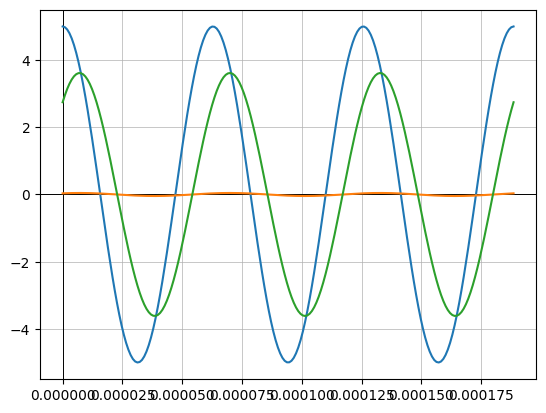

In [6]:
plotcont([re(Vg), L.i, R2.v], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

In [7]:
I_vals = Known.resolve(I, levels=-1, evalf=True)
Matrix([I_vals[0].simplify(), I_vals[1].simplify()])

Matrix([
[ (0.053921568627451 + 0.0490196078431373*I)*exp(100000.0*I*t)],
[(0.0343137254901961 - 0.0294117647058824*I)*exp(100000.0*I*t)]])

In [8]:
L_i = Known.resolve(L.i, levels=-1).simplify()
L_i

0.0294117647058824*sin(100000.0*t) + 0.0343137254901961*cos(100000.0*t)

Formula from https://www.dsprelated.com/showarticle/635.php

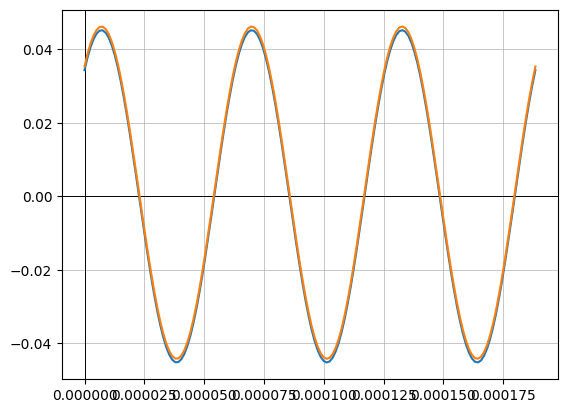

0.0451938453788867*cos(100000.0*t - 0.708626272127669)

In [9]:
L_i_ = sqrt(0.0294117647058823**2 + 0.0343137254901961**2)* cos(1e5*t - atan(0.0294117647058823/0.0343137254901961))
plotcont([L.i, L_i_+0.001], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
L_i_

In [10]:
V_o = Known.resolve(R2.v, levels=-1).simplify()
V_o

2.35294117647059*sin(100000.0*t) + 2.74509803921569*cos(100000.0*t)

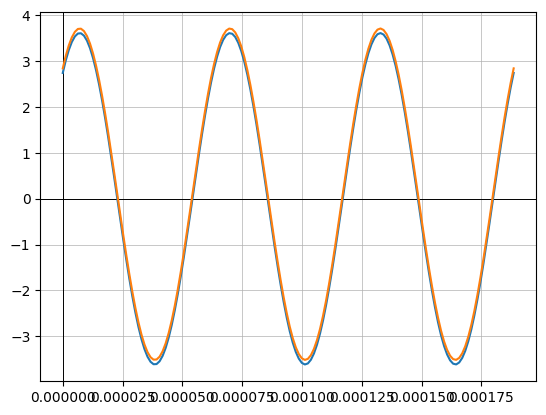

3.61550763031094*cos(100000.0*t - 0.70862627212767)

In [11]:
V_o_ = sqrt(2.74509803921569**2 + 2.35294117647059**2)* cos(1e5*t - atan(2.35294117647059/2.74509803921569))
plotcont([R2.v, V_o_+0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o_

## 2. Phase shift by π/3
---

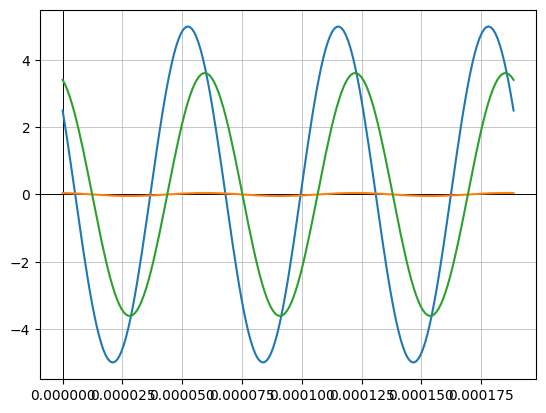

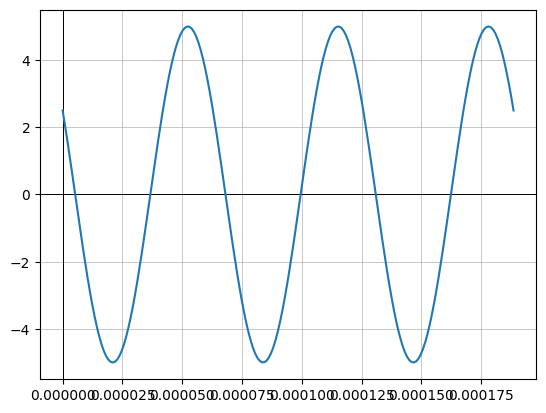

In [12]:
Vg.value = 5*exp(1j*(ω*t+pi/3))
plotcont([re(Vg), L.i, R2.v], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)
plotcont(re(5*exp(1j*(ω*t+pi/3))), [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

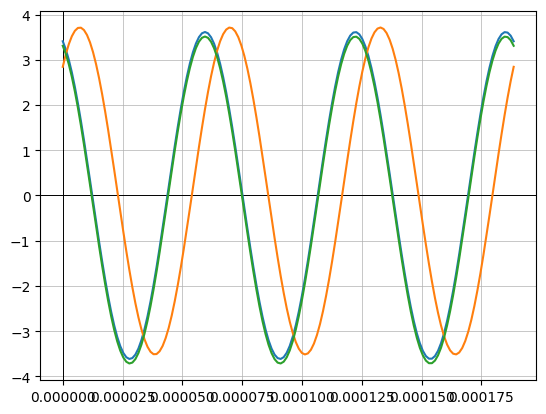

3.61550763031094*cos(100000.0*t - 0.70862627212767 + pi/3)

In [13]:
V_o_ = sqrt(2.74509803921569**2 + 2.35294117647059**2)* cos(1e5*t - atan(2.35294117647059/2.74509803921569)+pi/3)
plotcont([R2.v, V_o+0.1, V_o_-0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o_

In [14]:
(-atan(2.35294117647059/2.74509803921569)+pi/3).evalf()

0.338571279068928

## 3. Time delay by 3 seconds
---

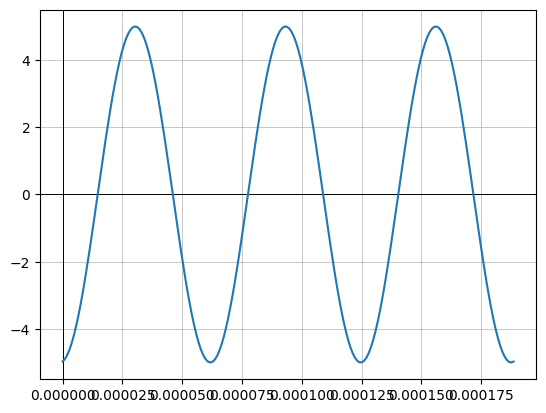

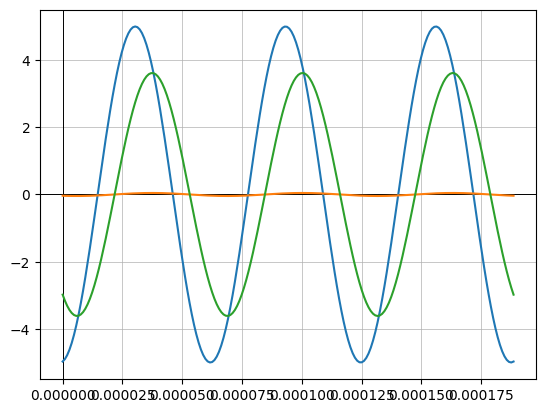

In [15]:
Vg.value = 5*exp(1j*(ω*(t-3)))
plotcont(re(5*exp(1j*(ω*(t-3)))), [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)
plotcont([re(Vg), L.i, R2.v], [0, 3*(2*pi/ω.evalf())], nsamples=200, vars=t)

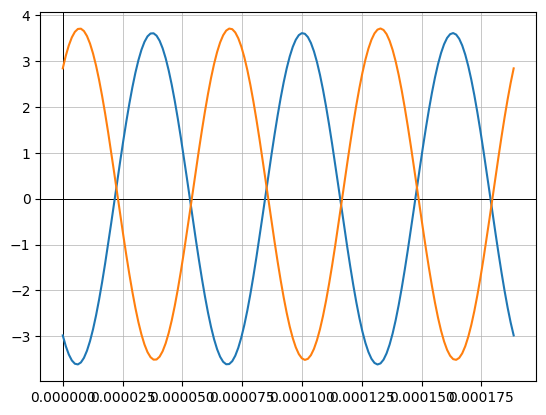

-2.04551665346561*sin(100000.0*t) - 2.98123414800506*cos(100000.0*t)

In [16]:
plotcont([R2.v, V_o+0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o = Known.resolve(R2.v, levels=-1).simplify()
V_o

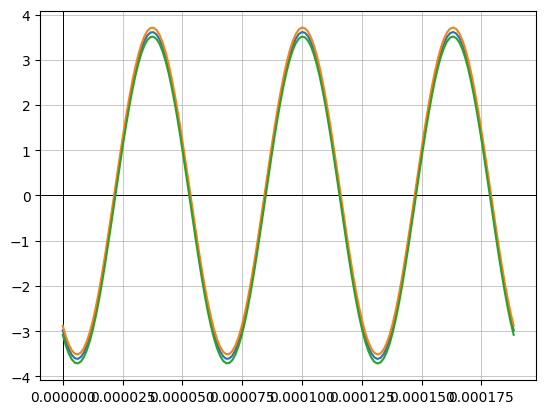

3.61550763031094*cos(100000.0*t - 300000.708626272)

In [17]:
V_o_ = sqrt(2.74509803921569**2 + 2.35294117647059**2)* cos(1e5*(t-3) - atan(2.35294117647059/2.74509803921569))
plotcont([R2.v, V_o+0.1, V_o_-0.1], [0, 3*(2*pi/ω.evalf())], nsamples=150, vars=t)
V_o_